In [1]:
from boxMigrate import boxMigrate

from pyproj import Proj
from pandas import DataFrame
import numpy as np

id = '4stt8wd7hn5c19obxhh2kpnf7419pni6'
secret = 'UfS1HnLjbgGeQuh4dtIXBJRT2kVdQC4M'
token = 'jcpcyiRenGeMOBoxLPLBDOcCHCOYqhL7'

target_dir = 'Rocky_Pflug'

subdirs = ['N40_0W106_0_agg_16','CV_weights','WY2020']

out_path = '/scratch/summit/jupf7869/500m/'

keys = ['B_Prior','CV_Prior','CVis_Prior','Weights']

xMin = 410000; xMax = 463500
yMin = 4414000; yMax = 4495000

In [2]:
x = [xMin, xMax, xMax, xMin]
y = [yMin, yMin, yMax, yMax]
df = DataFrame(np.c_[x,y],columns = ['Meters East','Meters South'])
project = Proj("+proj=utm +zone=13N")

lon, lat = project(df['Meters East'].values, df['Meters South'].values,
                  inverse=True)

In [3]:
client, root_directory = boxMigrate.target_directory(id,secret,token,target_dir)
print(root_directory)

<Box Folder - 142427205005 (Rocky_Pflug)>


In [4]:
test = boxMigrate.download_data(root_directory,subdirs,client,out_path,
                         filter='latlon',lon = lon,lat = lat,keys = keys)

/scratch/summit/jupf7869/500m/N40_0W106_0_agg_16_B_CV_CVis_PRIOR_WY2019_20.nc
B_Prior
Replicate_number
Longitude
Latitude
CV_Prior
Replicate_number
Already created this dimension
Longitude
Latitude
CVis_Prior
Replicate_number
Already created this dimension
Longitude
Latitude
Weights
/scratch/summit/jupf7869/500m/N40_0W106_0_agg_16_WEIGHTS_WY2019_20.nc
B_Prior
CV_Prior
CVis_Prior
Weights
Replicate_number
Longitude
Latitude


In [5]:
for key in keys:
    print(key)

B_Prior,CV_Prior,CVis_Prior


In [5]:
import netCDF4 as nc
dset = nc.Dataset('/scratch/summit/jupf7869/500m/N40_0W106_0_agg_16_WEIGHTS_WY2019_20_filt.nc')

In [6]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.imshow(dset['CV_Prior'][20,:,:])
print(dset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): Longitude(129), Latitude(138), Replicate_number(50)
    variables(dimensions): float32 Longitude(Longitude), float32 Latitude(Latitude), float32 Weights(Replicate_number, Longitude, Latitude)
    groups: 


In [23]:
dims = dset['B_Prior'].dimensions
for dim in dims:
    if (dim != 'Latitude') & (dim != 'Longitude'):
        print(dim)

Replicate_number


In [53]:
temp = dset['B_Prior'][:]
# temp = temp[:,0,0]
print(temp.take(indices=range(0,3),axis=1).shape)

(50, 3, 225)


In [38]:
dset['B_Prior

225

In [ ]:
import os
os.path.splitext(test)[0]+'_filt.nc'

In [6]:
? close

Object ` close` not found.


In [10]:
import netCDF4 as nc
temp = nc.Dataset('/scratch/summit/jupf7869/500m/N40_0W106_0_agg_16_SWE_SCA_POST_WY2019_20_filt.nc')
print(temp)
# temp.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): Longitude(129), Latitude(138), Day(366), Stats(5)
    variables(dimensions): float32 SWE_Post(Day, Stats, Longitude, Latitude), float32 SCA_Post(Day, Stats, Longitude, Latitude)
    groups: 


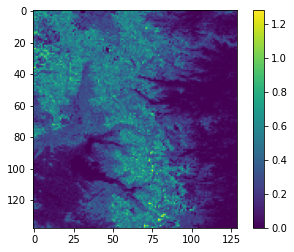

In [15]:
import matplotlib.pyplot as plt
plt.imshow(temp['SWE_Post'][190,2,:,:].T)
plt.colorbar()

In [9]:
import netCDF4 as nc
temp2 = nc.Dataset('/scratch/summit/jupf7869/500m/N40_0W106_0_agg_16_SWE_SCA_POST_WY2019_20.nc')
print(temp2)
# temp.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): Stats(5), Latitude(225), Longitude(225), Day(366)
    variables(dimensions): float32 Latitude(Latitude), float32 Longitude(Longitude), float32 SWE_Post(Day, Stats, Longitude, Latitude), float32 SCA_Post(Day, Stats, Longitude, Latitude)
    groups: 


In [7]:
ds = nc.Dataset('whatswrong.nc','w',format='NETCDF4')

In [9]:
Day = ds.createVariable('SWE_Post',


In [8]:
print(ds['Longitude'][:])
value = ds['SWE_Post'][:,:,:,:]
print(value)

IndexError: Longitude not found in /

In [ ]:
# prerequisites: 
# * install python-box software development kit (SDK) (https://developer.box.com/guides/tooling/sdks/python/)
# * create a development application in box profile
# * pull the client id, client secret from the development application and generate an access token
# * fill out the user-defined entries below
from boxsdk import OAuth2, Client

In [ ]:
# box developer authorization information
auth = OAuth2(client_id='4stt8wd7hn5c19obxhh2kpnf7419pni6',
              client_secret='UfS1HnLjbgGeQuh4dtIXBJRT2kVdQC4M',
              access_token='wpdy3jvwBAeuR1GtfLbkr9wDh9ThgLc6')
# directory to download files from (must be in the root directory)
target_dir = 'Rocky_Pflug'
# number of subdirectories (best-practice to set over the number)
num_subdir = 3
# destination directory to download to
out = '/scratch/summit/jupf7869/'

In [ ]:
# working code
# do: iterative loop with while < num_subdir and tries 
# do: output to destination directory

client = Client(auth)

root_folder = client.root_folder().get()
directories = root_folder.get_items()
for directory in directories:
    if directory.name == 'Rocky_Pflug':
        tiles = directory.get_items()
        for tile in tiles:
            years = tile.get_items()
            for year in years:
                dsets = year.get_items()
                for dset in dsets:
                    print(dset.name)
                    with open(dset.name,'wb') as open_file:
                        client.file(dset.id).download_to(open_file)
                break
            break
        break

In [ ]:
from boxMigrate import box2Linux
box2Linux('wpdy3jvwBAeuR1GtfLbkr9wDh9ThgLc6') 

In [ ]:
! pwd

In [ ]:
import boxMigrate

In [ ]:
boxMigrate.box2Linux('wpdy3jvwBAeuR1GtfLbkr9wDh9ThgLc6')

In [ ]:
import boxMigrate

In [ ]:
boxMigrate.boxMigrate.box2Linux('dXLB7F9arNYBD3H4THLLAu0raevpYaWU')

In [ ]:
from pyproj import Proj
from pandas import DataFrame
import numpy as np

In [ ]:
# for filtering based on lat lonx
xMin = 410000; xMax = 463500
yMin = 4414000; yMax = 4495000
x = [xMin, xMax, xMax, xMin]
y = [yMin, yMin, yMax, yMax]
df = DataFrame(np.c_[x,y],columns = ['Meters East','Meters South'])
project = Proj("+proj=utm +zone=13N")

lon, lat = project(df['Meters East'].values, df['Meters South'].values,
                  inverse=True)

In [ ]:
lonx = [];laty = [];
idx = np.abs(dset['Longitude'][:] - lon.min()).argmin()
if idx > 0:
    idx = idx - 1
lonx.append(idx)
idx = np.abs(dset['Longitude'][:] - lon.max()).argmin()
if idx < len(dset['Longitude'][:]):
    idx = idx + 1
lonx.append(idx)
print(lonx)

idx = np.abs(dset['Latitude'][:] - lat.min()).argmin()
if idx < len(dset['Latitude'[:]]):
    idx = idx + 1
laty.append(idx)
idx = np.abs(dset['Latitude'][:] - lat.max()).argmin()
if idx > 0:
    idx = idx - 1
laty.append(idx)
print(laty)

In [ ]:
print(dset)

In [ ]:
plt.imshow(dset['Ta_Post'][150,lonx[0]:lonx[1],laty[1]:laty[0]].T,vmin=255,vmax=275)
plt.colorbar()

In [ ]:
# create netcdf file from pandas dataset
ds = nc.Dataset('file2.nc','w',format='NETCDF4')
Day = ds.createDimension('Day',len(dset['Ta_Post'][:,1,1]))
Longitude = ds.createDimension('Longitude',lonx[1]-lonx[0])
Latitude = ds.createDimension('Latitude',laty[0]-laty[1])

In [ ]:
Ta_Post = ds.createVariable('Ta_Post', 'f4', ('Day','Longitude','Latitude',))
PPT_Post = ds.createVariable('PPT_Post', 'f4', ('Day','Longitude','Latitude',))

# Longitude[:] = np.array(dset['Longitude'][lonx[0]:lonx[1]])
# Latitude[:] = dset['Latitude'][laty[1]:laty[0]]
Ta_Post[:,:,:] = dset['Ta_Post'][:,lonx[0]:lonx[1],laty[1]:laty[0]]
PPT_Post[:,:,:] = dset['PPT_Post'][:,lonx[0]:lonx[1],laty[1]:laty[0]]

ds.close()

In [ ]:
ds.close()

In [ ]:
temp = nc.Dataset('file2.nc')
# print(temp['Ta_Post'][:])

# temp.close()

In [ ]:
plt.imshow(temp['Ta_Post'][100,:,:],vmin=255)

In [ ]:
from boxMigrate import boxMigrate

id = '4stt8wd7hn5c19obxhh2kpnf7419pni6'
secret = 'UfS1HnLjbgGeQuh4dtIXBJRT2kVdQC4M'
token = 'OqdobmH4dcEwVQjImbUn4uCiYX2hCNCS'

target_dir = 'Rocky_Pflug'

subdirs = ['N40_0W106_0_agg_16','WY2020']

out_path = '/scratch/summit/jupf7869/500m/'

In [ ]:
client, root_directory = boxMigrate.target_directory(id,secret,token,target_dir)
print(root_directory)

In [ ]:
boxMigrate.download_data(root_directory,subdirs,client,out_path)

In [ ]:
def filtNC(dset,keys,**kwargs):
    if kwargs.get('filter', None) == 'latlon':
        lon = kwargs.get('lon')
        lat = kwargs.get('lat')
        
        lonx = [];laty = [];
        idx = np.abs(dset['Longitude'][:] - lon.min()).argmin()
        if idx > 0:
            idx = idx - 1
        lonx.append(idx)
        idx = np.abs(dset['Longitude'][:] - lon.max()).argmin()
        if idx < len(dset['Longitude'][:]):
            idx = idx + 1
        lonx.append(idx)
#         print(lonx)

        idx = np.abs(dset['Latitude'][:] - lat.min()).argmin()
        if idx < len(dset['Latitude'[:]]):
            idx = idx + 1
        laty.append(idx)
        idx = np.abs(dset['Latitude'][:] - lat.max()).argmin()
        if idx > 0:
            idx = idx - 1
        laty.append(idx)
#         print(laty)
        
        ds = nc.Dataset('outfile2.nc','w',format='NETCDF4')
        Day = ds.createDimension('Day',len(dset['Ta_Post'][:,1,1]))
        Longitude = ds.createDimension('Longitude',lonx[1]-lonx[0])
        Latitude = ds.createDimension('Latitude',laty[0]-laty[1])
        
        for key in keys:
            var = ds.createVariable(key, 'f4', ('Day', 'Longitude', 'Latitude',))
            var[:,:,:] = dset[key][:,lonx[0]:lonx[1],laty[1]:laty[0]]
        
#         Longitude = ds.createVariable('Longitude', 'f4', ('Longitude',))
#         Latitude = ds.createVariable('Latitude', 'f4', ('Latitude',))
#         Ta_Post = ds.createVariable('Ta_Post', 'f4', ('Day','Longitude','Latitude',))
#         PPT_Post = ds.createVariable('PPT_Post', 'f4', ('Day','Longitude','Latitude',))
        

#         Longitude[:] = np.array(dset['Longitude'][lonx[0]:lonx[1]])
#         Latitude[:] = dset['Latitude'][laty[1]:laty[0]]
#         Ta_Post[:,:,:] = dset['Ta_Post'][:,lonx[0]:lonx[1],laty[1]:laty[0]]
#         PPT_Post[:,:,:] = dset['PPT_Post'][:,lonx[0]:lonx[1],laty[1]:laty[0]]

        ds.close()
    return

In [ ]:
from pyproj import Proj
from pandas import DataFrame
import numpy as np

# for filtering based on lat lonx
xMin = 410000; xMax = 463500
yMin = 4414000; yMax = 4495000
x = [xMin, xMax, xMax, xMin]
y = [yMin, yMin, yMax, yMax]
df = DataFrame(np.c_[x,y],columns = ['Meters East','Meters South'])
project = Proj("+proj=utm +zone=13N")

lon, lat = project(df['Meters East'].values, df['Meters South'].values,
                  inverse=True)

In [8]:
import netCDF4 as nc
dset = nc.Dataset(out_path+'N40_0W106_0_agg_16_FORCING_POST_WY2019_20.nc')

print(dset)

# keys = ['Ta_Post','PPT_Post']
# filtNC(dset,keys,filter = 'latlon',lat = lat,lon = lon)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): Latitude(225), Longitude(225), Day(366)
    variables(dimensions): float32 Latitude(Latitude), float32 Longitude(Longitude), float32 Ta_Post(Day, Longitude, Latitude), float32 Rs_Post(Day, Longitude, Latitude), float32 Rl_Post(Day, Longitude, Latitude), float32 Ps_Post(Day, Longitude, Latitude), float32 PPT_Post(Day, Longitude, Latitude), float32 q_Post(Day, Longitude, Latitude), float32 wind_Post(Day, Longitude, Latitude)
    groups: 


In [ ]:
dset = nc.Dataset('outfile2.nc')
print(dset)
dset.close()

In [ ]:
import matplotlib.pyplot as plt
? plt.imshow

In [ ]:
# thin data by lat lon

import netCDF4 as nc
import matplotlib.pyplot as plt

dset = nc.Dataset(out_path+'N40_0W106_0_agg_16_FORCING_POST_WY2019_20.nc')

# plt.imshow(dset[''])

In [ ]:
extent=[dset['Longitude'][:].min(),dset['Longitude'][:].max(),
        dset['Latitude'][:].min(),dset['Latitude'][:].max()]
plt.imshow(dset['Ta_Post'][150,:,:].T,vmin=255,vmax=275,extent=extent)
plt.colorbar()

In [ ]:
from sentinelhub import SHConfig

config = SHConfig()

config.instance_id = 'cc0bd2d9-8615-4e55-bccf-3c396213fcda'
config.sh_client_id = '6b7faac4-da96-464f-930f-9960c842e991'
config.sh_client_secret = 'I@;o13-,*c?3#&YE^Up.!>7M!Au]U:zeCO~.3G^y'

config.save()

resolution = 60
betsiboka_coords_wgs84 = [dset['Longitude'][:].min(),dset['Latitude'][:].min(),
                          dset['Longitude'][:].max(), dset['Latitude'][:].max()]
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)
time_interval = ('2019-06-01', '2020-06-30')

In [ ]:
from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, \
    DataCollection, bbox_to_dimensions, DownloadRequest
from sentinelhub import SHConfig
# from utils import plot_image

# config = SHConfig()
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=time_interval,
            mosaicking_order='leastCC'
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)
# plot_image(request_true_color.get_data()[0], factor=3.5/255, clip_range=(0,1))


In [ ]:
temp = request_true_color.get_data()[0]

In [ ]:
import numpy as np
plt.imshow(np.add(temp,35))
plt.colorbar()

In [ ]:
directories = folder.get_items()
print(directories)

In [ ]:
for directory in directories:
    print(directory)

In [ ]:
? plt.imshow

In [ ]:
? imadd